In [1]:
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime  

sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6) 

In [2]:
# Предобработка данных
df = pd.read_csv(
    r'C:\Users\vic\Downloads\dano_dataset_travel.csv', 
    sep=';',                                           
    low_memory=False,                                    
    on_bad_lines='skip'                                  
)

numeric_cols = ['nominal_price_rub_amt', 'nominal_price_eur_amt', 'loyalty_accrual_rub_amt', 
                'promo_code_discount_amt', 'order_item_cnt', 'monthly_income_amt', 
                'month_beginning_balance_rub', 'children_cnt', 'age', 'order_online_payment_flg']

print("Первые 10 строк числовых столбцов до преобразования:")
display(df[numeric_cols].head(10))

print("\nУникальные значения до преобразования (первые 10):")
for col in numeric_cols:
    if col in df.columns:
        unique_vals = df[col].astype(str).dropna().unique()[:10]
        print(f"{col}: {unique_vals}")

        non_numeric = df[col].astype(str).str.contains(r'[^0-9\.\-]', na=False).sum()
        print(f"Количество нечисловых значений в {col}: {non_numeric}")

Первые 10 строк числовых столбцов до преобразования:


,nominal_price_rub_amt,nominal_price_eur_amt,loyalty_accrual_rub_amt,promo_code_discount_amt,order_item_cnt,monthly_income_amt,month_beginning_balance_rub,children_cnt,age,order_online_payment_flg
0,"15018,0","142,0",NaN,"0,0","1,0","113900,0","9185,0","0,0","31,0","1,0"
1,"27751,0","277,0","277,0",NaN,NaN,"53600,0","25780,0","0,0","39,0","1,0"
2,"7590,0","79,0","565,0","0,0","1,0",NaN,"447,0","0,0","28,0","1,0"
3,"7705,0","73,0",NaN,NaN,NaN,"234500,0","12549,0","0,0","61,0","1,0"
4,"8352,0","85,0","584,0","0,0","1,0","703500,0","6023,0","0,0","36,0","1,0"
5,"12149,0","127,0","364,0","0,0","1,0","0,0","17264,0",NaN,"36,0","1,0"
6,"17971,0","186,0",NaN,"0,0","4,0","80400,0","234,0","0,0","38,0","1,0"
7,"17191,0","172,0",NaN,"0,0","1,0","335000,0","27275,0","0,0","42,0","1,0"
8,"11457,0","116,0","573,0","0,0","1,0",NaN,"426,0",NaN,"30,0","1,0"
9,"4866,0","51,0","243,0","0,0","1,0","670000,0","-26599,0","0,0","45,0","1,0"



Уникальные значения до преобразования (первые 10):
nominal_price_rub_amt: ['15018,0' '27751,0' '7590,0' '7705,0' '8352,0' '12149,0' '17971,0'
 '17191,0' '11457,0' '4866,0']
Количество нечисловых значений в nominal_price_rub_amt: 835938
nominal_price_eur_amt: ['142,0' '277,0' '79,0' '73,0' '85,0' '127,0' '186,0' '172,0' '116,0'
 '51,0']
Количество нечисловых значений в nominal_price_eur_amt: 835938
loyalty_accrual_rub_amt: ['nan' '277,0' '565,0' '584,0' '364,0' '573,0' '243,0' '1355,0' '131,0'
 '645,0']
Количество нечисловых значений в loyalty_accrual_rub_amt: 835938
promo_code_discount_amt: ['0,0' 'nan' '335,0' '670,0' '469,0' '201,0' '100,0' '1340,0' '2010,0'
 '3002,0']
Количество нечисловых значений в promo_code_discount_amt: 835938
order_item_cnt: ['1,0' 'nan' '4,0' '2,0' '3,0' '5,0' '6,0' '8,0' '7,0' '9,0']
Количество нечисловых значений в order_item_cnt: 835938
monthly_income_amt: ['113900,0' '53600,0' 'nan' '234500,0' '703500,0' '0,0' '80400,0'
 '335000,0' '670000,0' '67000,0']


In [3]:
# Список числовых столбцов
numeric_cols = [
    'nominal_price_rub_amt', 'nominal_price_eur_amt', 'loyalty_accrual_rub_amt', 
    'promo_code_discount_amt', 'order_item_cnt', 'monthly_income_amt', 
    'month_beginning_balance_rub', 'children_cnt', 'age'
]


for col in numeric_cols:
    if col in df.columns:

        df[col] = df[col].replace(['nan', 'NaN', 'N/A', ''], np.nan)

        df[col] = df[col].astype(str).str.replace(',', '.').str.strip()

        if col in ['order_item_cnt', 'children_cnt', 'age']:
            df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')
        print(f"Преобразован {col} в {'Int64' if col in ['order_item_cnt', 'children_cnt', 'age'] else 'float64'}.")

        missing = df[col].isna().mean() * 100
        print(f"Процент пропусков в {col}: {missing:.2f}%")

print("\nПервые 5 строк числовых столбцов после преобразования:")
display(df[numeric_cols].head())

print("\nСтатистика числовых столбцов:")
display(df[numeric_cols].describe())

Преобразован nominal_price_rub_amt в float64.
Процент пропусков в nominal_price_rub_amt: 5.87%
Преобразован nominal_price_eur_amt в float64.
Процент пропусков в nominal_price_eur_amt: 5.87%
Преобразован loyalty_accrual_rub_amt в float64.
Процент пропусков в loyalty_accrual_rub_amt: 43.14%
Преобразован promo_code_discount_amt в float64.
Процент пропусков в promo_code_discount_amt: 26.32%
Преобразован order_item_cnt в Int64.
Процент пропусков в order_item_cnt: 26.39%
Преобразован monthly_income_amt в float64.
Процент пропусков в monthly_income_amt: 19.48%
Преобразован month_beginning_balance_rub в float64.
Процент пропусков в month_beginning_balance_rub: 7.10%
Преобразован children_cnt в Int64.
Процент пропусков в children_cnt: 13.91%
Преобразован age в Int64.
Процент пропусков в age: 0.00%

Первые 5 строк числовых столбцов после преобразования:


,nominal_price_rub_amt,nominal_price_eur_amt,loyalty_accrual_rub_amt,promo_code_discount_amt,order_item_cnt,monthly_income_amt,month_beginning_balance_rub,children_cnt,age
0,15018.0,142.0,NaN,0.0,1,113900.0,9185.0,0,31
1,27751.0,277.0,277.0,NaN,<NA>,53600.0,25780.0,0,39
2,7590.0,79.0,565.0,0.0,1,NaN,447.0,0,28
3,7705.0,73.0,NaN,NaN,<NA>,234500.0,12549.0,0,61
4,8352.0,85.0,584.0,0.0,1,703500.0,6023.0,0,36



Статистика числовых столбцов:


,nominal_price_rub_amt,nominal_price_eur_amt,loyalty_accrual_rub_amt,promo_code_discount_amt,order_item_cnt,monthly_income_amt,month_beginning_balance_rub,children_cnt,age
count,7.868850e+05,786885.000000,475353.000000,615900.000000,615337.0,6.730780e+05,7.766280e+05,719699.0,835937.0
mean,1.517810e+04,153.703915,644.108014,5.448974,1.399914,1.473086e+05,4.259195e+04,0.070938,36.073155
std,2.402879e+04,243.007488,1586.753948,156.241146,0.777048,2.660834e+05,1.990449e+05,0.361574,9.370449
min,1.000000e+00,0.000000,-8645.000000,0.000000,1.0,0.000000e+00,-1.498962e+07,0.0,14.0
25%,5.090000e+03,52.000000,154.000000,0.000000,1.0,5.360000e+04,4.240000e+02,0.0,29.0
50%,9.342000e+03,95.000000,326.000000,0.000000,1.0,9.715000e+04,5.282000e+03,0.0,35.0
75%,1.652700e+04,167.000000,682.000000,0.000000,2.0,1.675000e+05,2.735925e+04,0.0,41.0
max,2.025808e+06,21080.000000,606732.000000,67000.000000,9.0,6.700000e+07,2.370640e+07,8.0,98.0


In [4]:
# Флаги
flag_cols = ['order_online_payment_flg', 'suppress_email_flg', 'suppress_call_flg', 'email_valid_flg',
             'last_sms_success_flg', 'call_contact_6m_flg', 'call_contact_3m_flg', 'call_contact_1m_flg',
             'good_email_address_flg', 'bad_email_address_flg']

for col in flag_cols:
    if col in df.columns:
        unique_vals = df[col].dropna().unique()
        print(f"Уникальные значения в {col}: {unique_vals}")

        df[col] = df[col].replace(['nan', 'NaN', 'N/A', ''], np.nan)
        df[col] = df[col].astype(str).str.replace(',', '.').str.strip()

        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].astype('boolean')
        print(f"Преобразован {col} в boolean.")

        missing = df[col].isna().mean() * 100
        print(f"Процент пропусков в {col}: {missing:.2f}%")

Уникальные значения в order_online_payment_flg: ['1,0']
Преобразован order_online_payment_flg в boolean.
Процент пропусков в order_online_payment_flg: 5.87%
Уникальные значения в suppress_email_flg: [0 1]
Преобразован suppress_email_flg в boolean.
Процент пропусков в suppress_email_flg: 0.00%
Уникальные значения в suppress_call_flg: [0 1]
Преобразован suppress_call_flg в boolean.
Процент пропусков в suppress_call_flg: 0.00%
Уникальные значения в email_valid_flg: [1 0]
Преобразован email_valid_flg в boolean.
Процент пропусков в email_valid_flg: 0.00%
Уникальные значения в last_sms_success_flg: ['1,0' '0,0']
Преобразован last_sms_success_flg в boolean.
Процент пропусков в last_sms_success_flg: 0.24%
Уникальные значения в call_contact_6m_flg: ['0,0']
Преобразован call_contact_6m_flg в boolean.
Процент пропусков в call_contact_6m_flg: 99.97%
Уникальные значения в call_contact_3m_flg: ['0,0']
Преобразован call_contact_3m_flg в boolean.
Процент пропусков в call_contact_3m_flg: 99.97%
Уникаль

In [5]:
# Даты
date_cols = [
    'party_first_order_dt', 'party_first_order_type_dt', 'free_cancel_booking_dttm',
    'created_dttm', 'cancel_dttm', 'book_start_dttm', 'local_book_start_dttm',
    'book_end_dttm', 'last_sms_dt', 'last_email_send_dt', 'last_session_dttm'
]

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"Преобразован {col} в datetime.")

print("\nТипы дат после преобразования:")
display(df[date_cols].dtypes)

Преобразован party_first_order_dt в datetime.
Преобразован party_first_order_type_dt в datetime.
Преобразован free_cancel_booking_dttm в datetime.
Преобразован created_dttm в datetime.
Преобразован cancel_dttm в datetime.
Преобразован book_start_dttm в datetime.
Преобразован local_book_start_dttm в datetime.
Преобразован book_end_dttm в datetime.
Преобразован last_sms_dt в datetime.
Преобразован last_email_send_dt в datetime.
Преобразован last_session_dttm в datetime.

Типы дат после преобразования:


party_first_order_dt         datetime64[ns]
party_first_order_type_dt    datetime64[ns]
free_cancel_booking_dttm     datetime64[ns]
created_dttm                 datetime64[ns]
cancel_dttm                  datetime64[ns]
book_start_dttm              datetime64[ns]
local_book_start_dttm        datetime64[ns]
book_end_dttm                datetime64[ns]
last_sms_dt                  datetime64[ns]
last_email_send_dt           datetime64[ns]
last_session_dttm            datetime64[ns]
dtype: object

In [6]:
# Категории
categorical_cols = [
    'loyalty_program_type_nm', 'bundle_nm', 'order_type_cd',
    'order_status_cd', 'hotel_country', 'hotel_city', 'avia_dep_city', 'avia_arr_city',
    'age_type_cd', 'parent_meeting_region_nm', 'delivery_region_category_cd',
    'lvn_city_nm', 'lvn_state_nm', 'time_zone_cd', 'last_used_product_cd',
    'first_used_product_cd', 'mobile_phone_operator_nm', 'marital_status_cd',
    'education_level_cd', 'gender_cd', 'bounce_cd'
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"Преобразован {col} в category.")

print("\nТипы категорий после преобразования:")
display(df[categorical_cols].dtypes)

Преобразован loyalty_program_type_nm в category.
Преобразован bundle_nm в category.
Преобразован order_type_cd в category.
Преобразован order_status_cd в category.
Преобразован hotel_country в category.
Преобразован hotel_city в category.
Преобразован avia_dep_city в category.
Преобразован avia_arr_city в category.
Преобразован age_type_cd в category.
Преобразован parent_meeting_region_nm в category.
Преобразован delivery_region_category_cd в category.
Преобразован lvn_city_nm в category.
Преобразован lvn_state_nm в category.
Преобразован time_zone_cd в category.
Преобразован last_used_product_cd в category.
Преобразован first_used_product_cd в category.
Преобразован mobile_phone_operator_nm в category.
Преобразован marital_status_cd в category.
Преобразован education_level_cd в category.
Преобразован gender_cd в category.
Преобразован bounce_cd в category.

Типы категорий после преобразования:


loyalty_program_type_nm        category
bundle_nm                      category
order_type_cd                  category
order_status_cd                category
hotel_country                  category
hotel_city                     category
avia_dep_city                  category
avia_arr_city                  category
age_type_cd                    category
parent_meeting_region_nm       category
delivery_region_category_cd    category
lvn_city_nm                    category
lvn_state_nm                   category
time_zone_cd                   category
last_used_product_cd           category
first_used_product_cd          category
mobile_phone_operator_nm       category
marital_status_cd              category
education_level_cd             category
gender_cd                      category
bounce_cd                      category
dtype: object

In [7]:
missing_perc = df.isnull().mean() * 100
print("Процент пропусков (топ-10):")
display(missing_perc.sort_values(ascending=False).head(10))

print("\nПропуски в hotel_country и avia_dep_city по типу заказа:")
display(df.groupby('order_type_cd', observed=True)[['hotel_country', 'avia_dep_city']].apply(lambda x: x.isnull().mean()))

Процент пропусков (топ-10):


cancel_dttm                 100.000000
call_contact_1m_flg          99.967581
call_contact_3m_flg          99.967581
call_contact_6m_flg          99.967581
good_email_address_flg       97.631643
bad_email_address_flg        97.631643
last_email_send_dt           97.631643
bounce_cd                    95.253835
free_cancel_booking_dttm     90.956267
hotel_country                80.590905
dtype: float64


Пропуски в hotel_country и avia_dep_city по типу заказа:


,hotel_country,avia_dep_city
order_type_cd,,
AIR,1.000000,0.000101
HOT,0.054212,1.000000


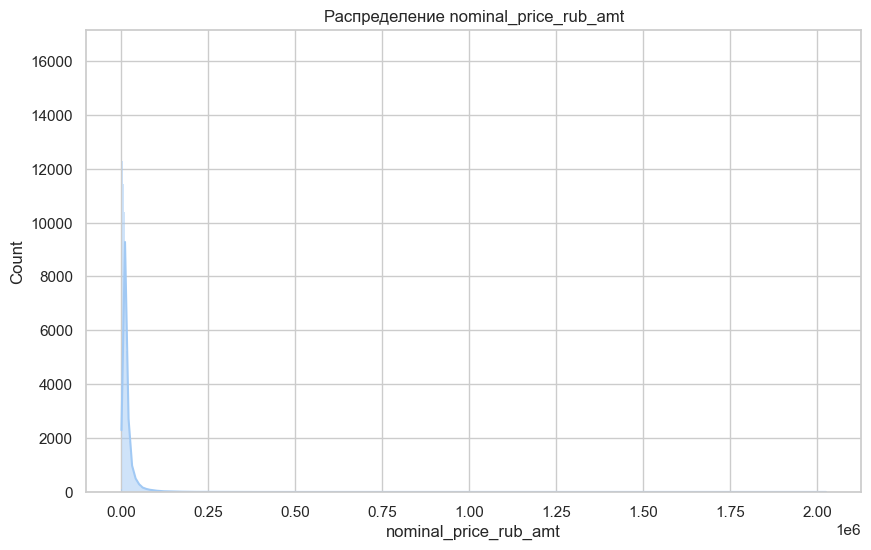

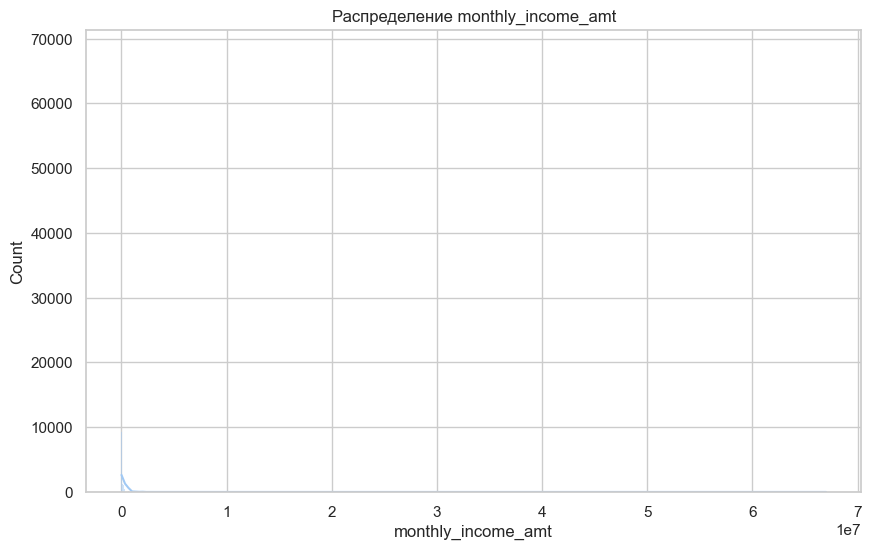

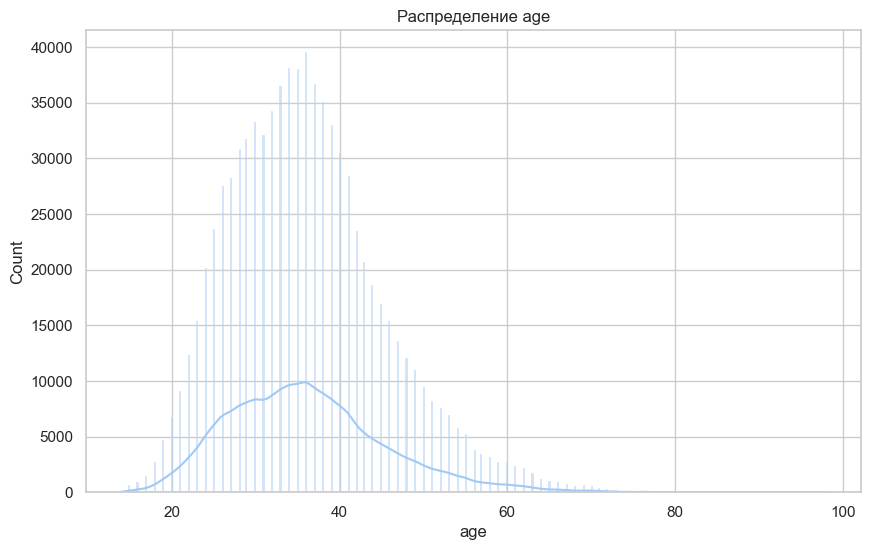

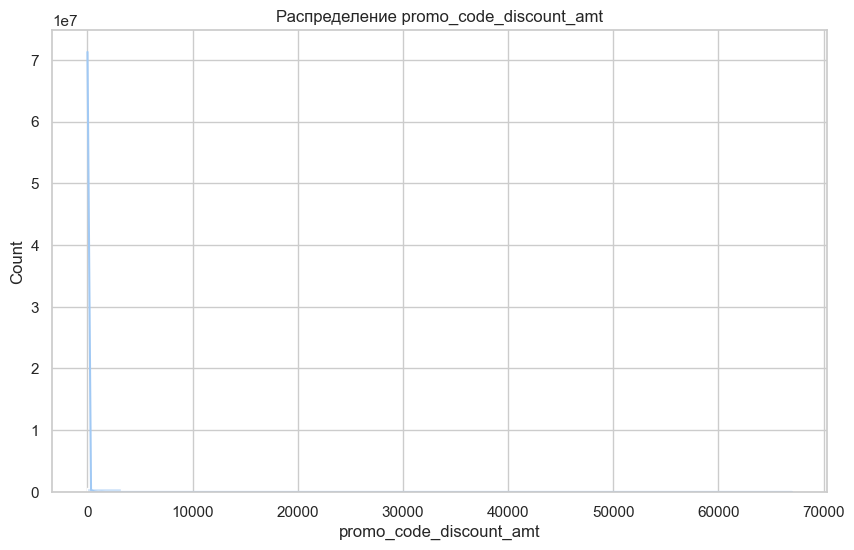

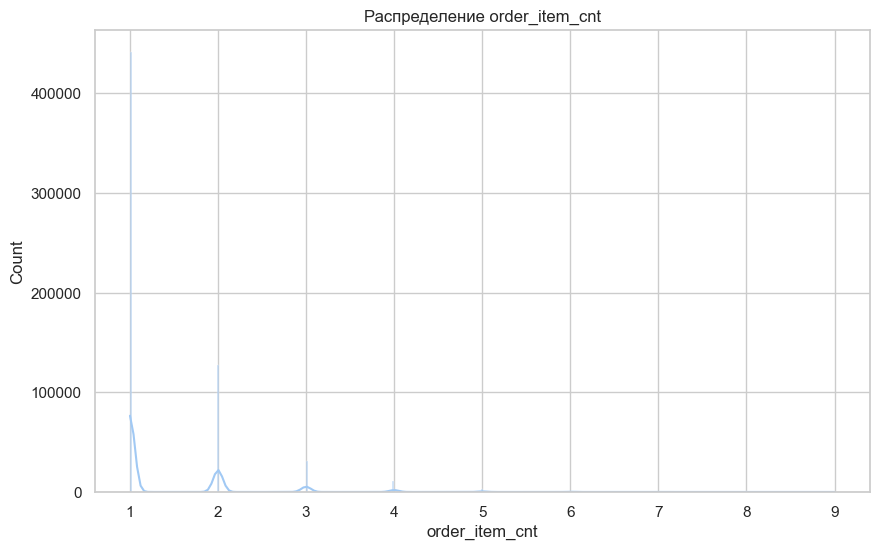

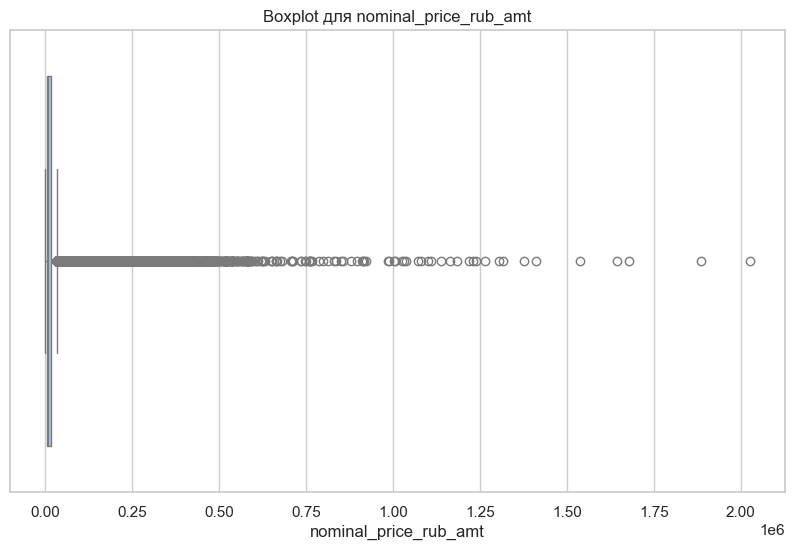

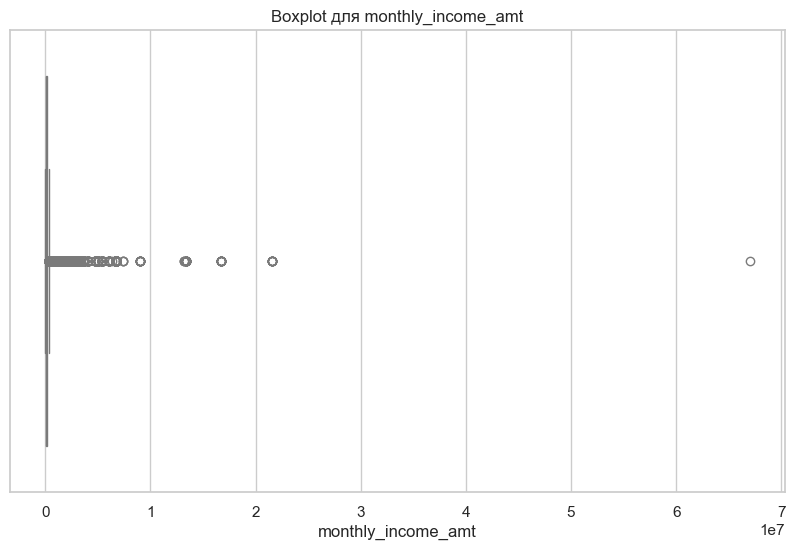

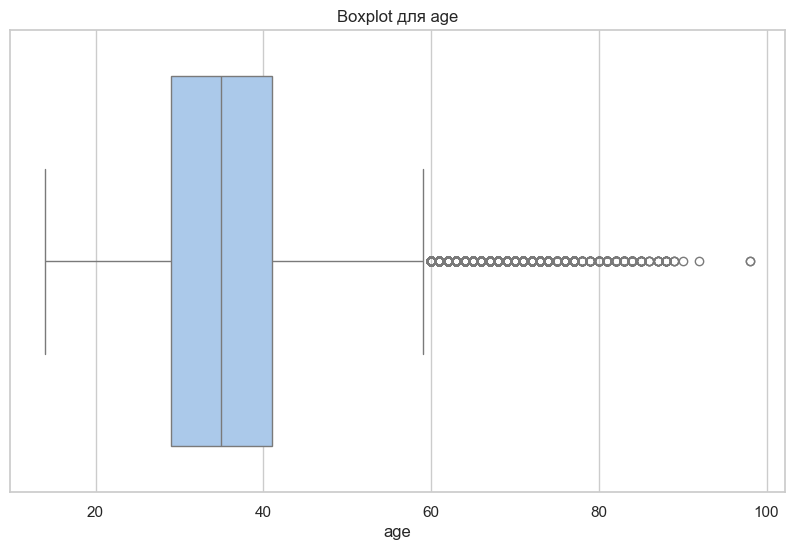

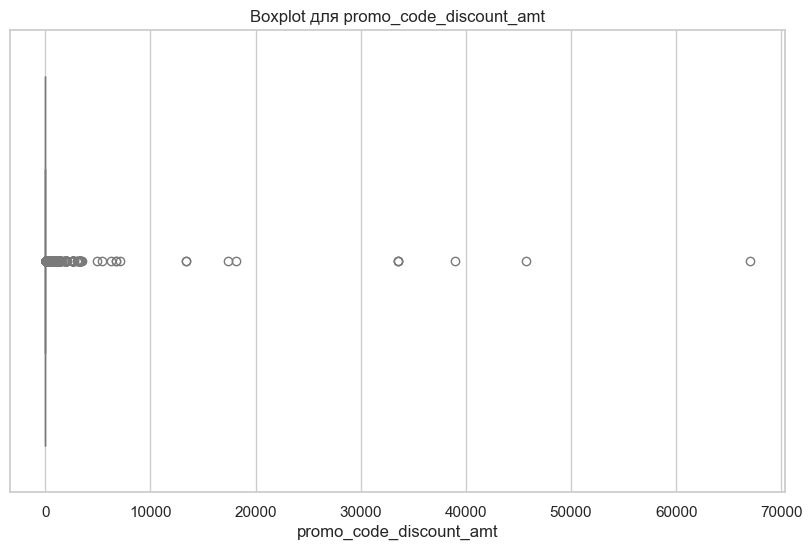

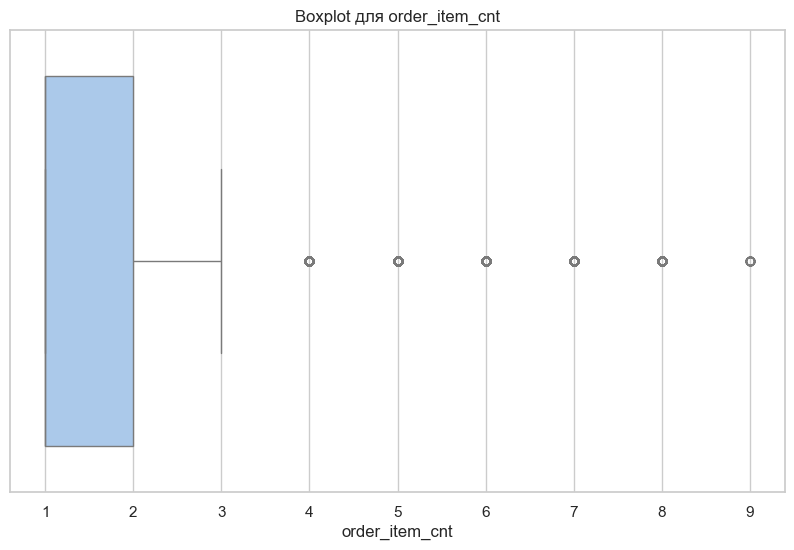

nominal_price_rub_amt: p-value = 0.0000, ненормальное
monthly_income_amt: p-value = 0.0000, ненормальное
age: p-value = 0.0000, ненормальное
promo_code_discount_amt: p-value = 0.0000, ненормальное
order_item_cnt: p-value = 0.0000, ненормальное

Выбросы в nominal_price_rub_amt: 65993 значений
Границы: [-12065.50, 33682.50]

Выбросы в monthly_income_amt: 45349 значений
Границы: [-117250.00, 338350.00]

Выбросы в age: 16201 значений
Границы: [11.00, 59.00]

Выбросы в promo_code_discount_amt: 7718 значений
Границы: [0.00, 0.00]

Выбросы в order_item_cnt: 16248 значений
Границы: [-0.50, 3.50]


In [8]:
# Распределения числовых переменных
numeric_cols = ['nominal_price_rub_amt', 'monthly_income_amt', 'age', 'promo_code_discount_amt', 'order_item_cnt']
for col in numeric_cols:
    if df[col].notna().sum() > 0:
        plt.figure()
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Распределение {col}')
        plt.xlabel(col)
        plt.show()

for col in numeric_cols:
    if df[col].notna().sum() > 0:
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot для {col}')
        plt.show()

from scipy.stats import shapiro
for col in numeric_cols:
    if df[col].notna().sum() > 0:
        stat, p = shapiro(df[col].dropna().sample(5000))  # Берем 5000 для скорости
        print(f"{col}: p-value = {p:.4f}, {'нормальное' if p > 0.05 else 'ненормальное'}")

for col in numeric_cols:
    if df[col].notna().sum() > 0:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\nВыбросы в {col}: {outliers.count()} значений")
        print(f"Границы: [{lower_bound:.2f}, {upper_bound:.2f}]")

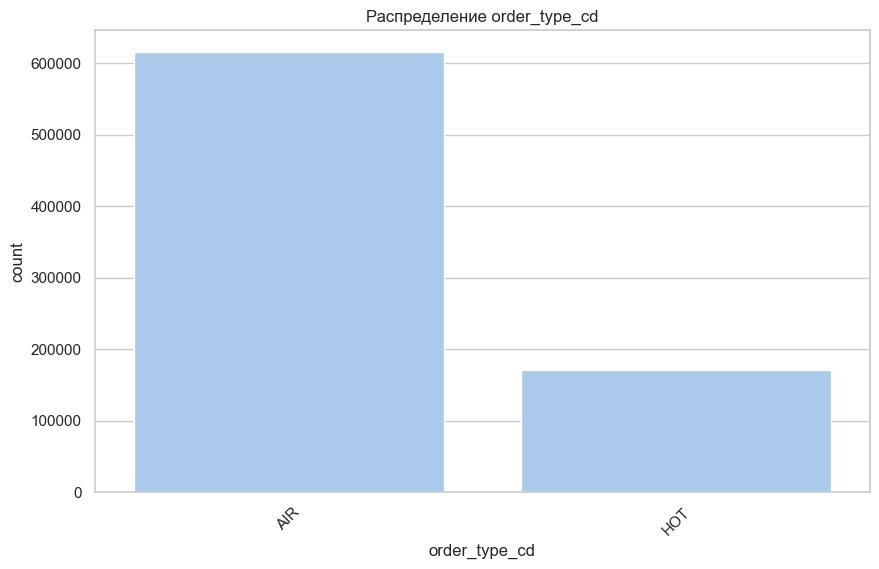


Доля значений в order_type_cd:


order_type_cd
AIR    0.781991
HOT    0.218009
Name: proportion, dtype: float64

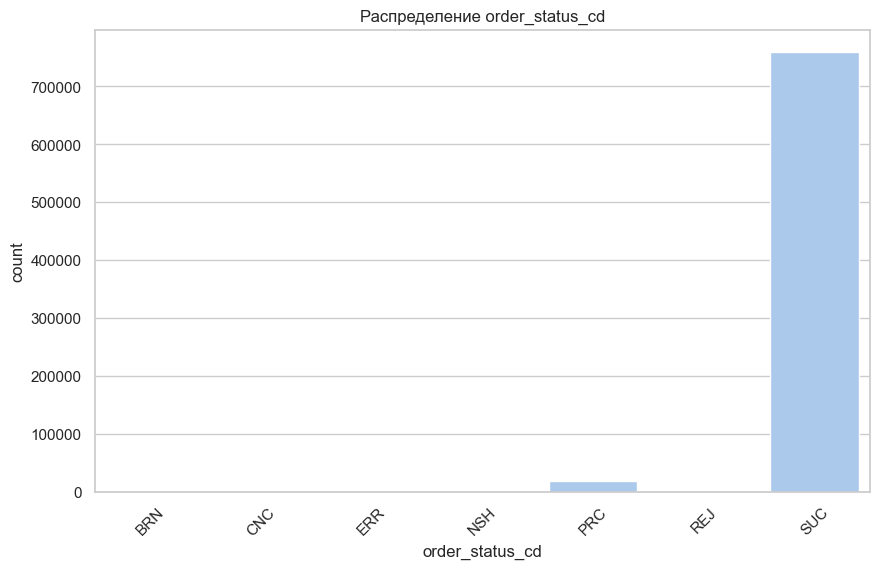


Доля значений в order_status_cd:


order_status_cd
SUC    0.974902
PRC    0.023690
ERR    0.000834
NSH    0.000390
CNC    0.000108
REJ    0.000074
BRN    0.000001
Name: proportion, dtype: float64

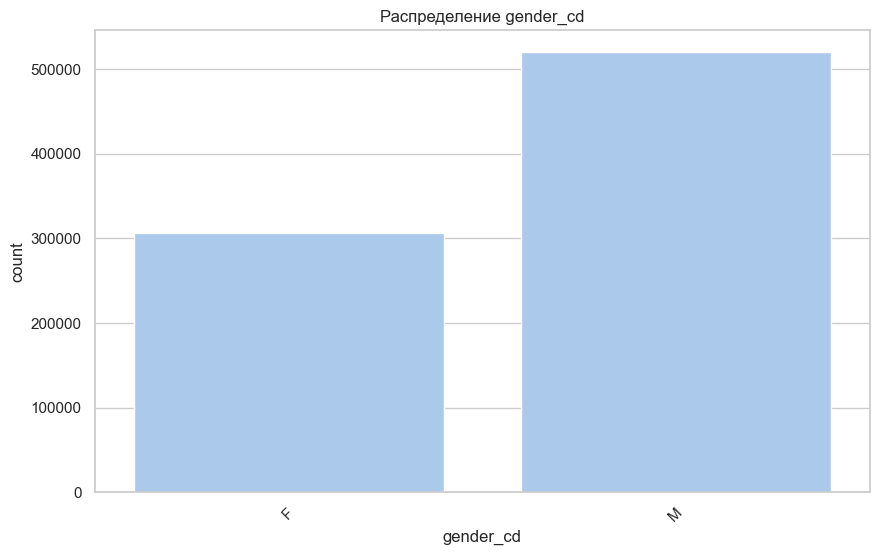


Доля значений в gender_cd:


gender_cd
M    0.629346
F    0.370654
Name: proportion, dtype: float64

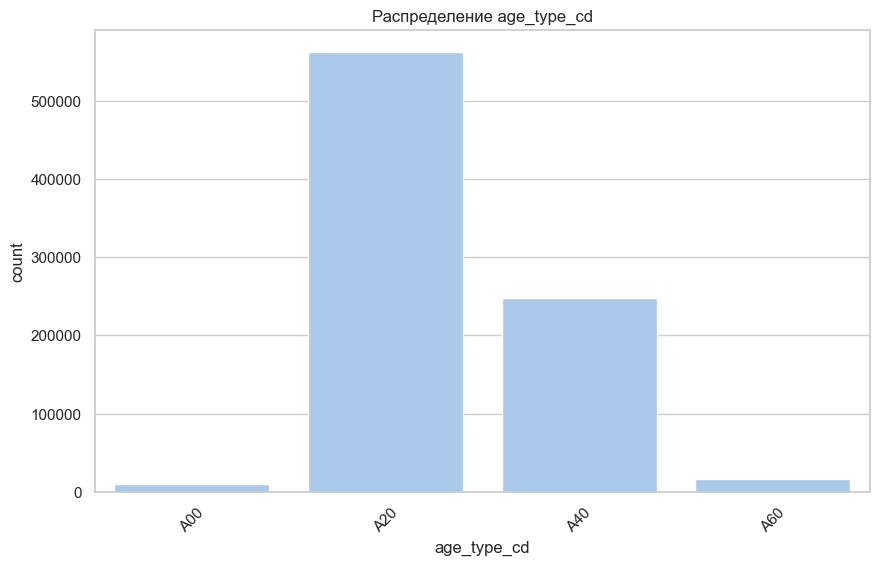


Доля значений в age_type_cd:


age_type_cd
A20    0.672785
A40    0.295588
A60    0.019091
A00    0.012536
Name: proportion, dtype: float64

In [9]:
# Анализ категориальных переменных
cat_cols = ['order_type_cd', 'order_status_cd', 'gender_cd', 'age_type_cd']
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f'Распределение {col}')
    plt.xticks(rotation=45)
    plt.show()

    print(f"\nДоля значений в {col}:")
    display(df[col].value_counts(normalize=True))

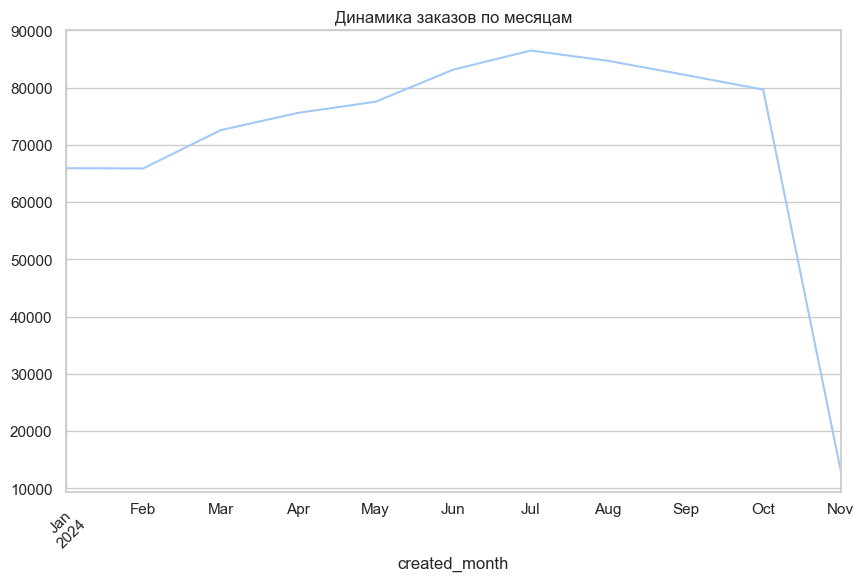

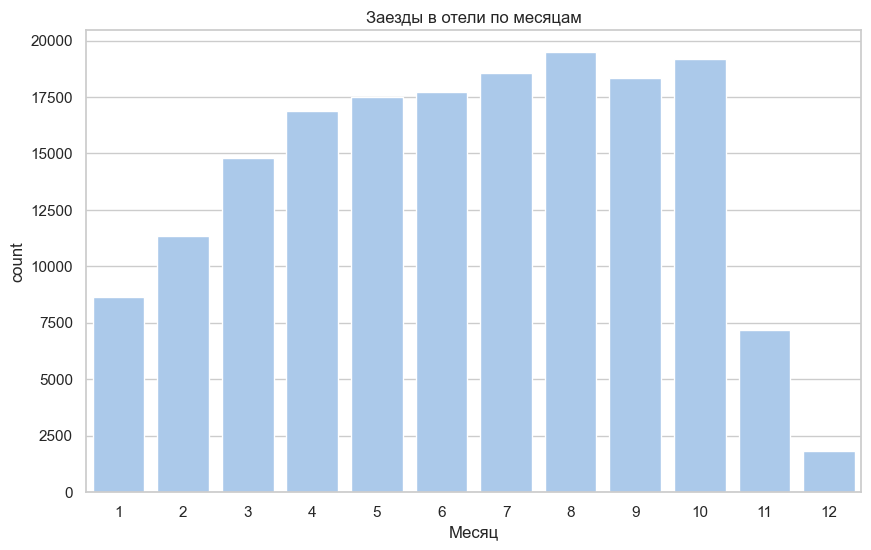

In [10]:
# Временной анализ
df['created_month'] = df['created_dttm'].dt.to_period('M')
orders_by_month = df.groupby('created_month').size()
plt.figure()
orders_by_month.plot(kind='line')
plt.title('Динамика заказов по месяцам')
plt.xticks(rotation=45)
plt.show()

df_hotels = df[df['order_type_cd'] == 'HOT'].copy()
df_hotels.loc[:, 'book_month'] = df_hotels['book_start_dttm'].dt.month
plt.figure()
sns.countplot(x='book_month', data=df_hotels)
plt.title('Заезды в отели по месяцам')
plt.xlabel('Месяц')
plt.savefig('hotel_bookings_by_month.png')
plt.show()

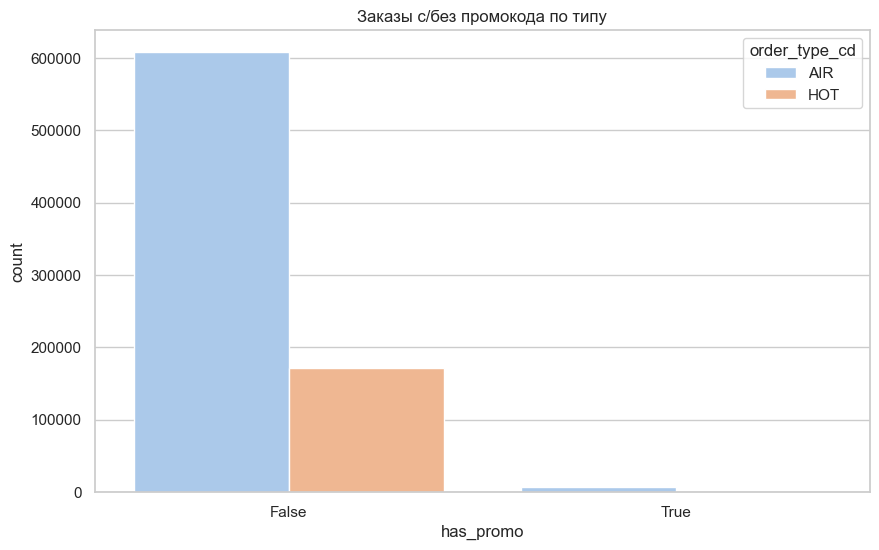


Доля заказов с промокодом:


has_promo
False    0.990767
True     0.009233
Name: proportion, dtype: float64


Средняя цена заказа по промокодам и типу:


has_promo  order_type_cd
False      AIR              16096.157127
           HOT              11972.827809
True       AIR              14092.628512
           HOT              10698.644760
Name: nominal_price_rub_amt, dtype: float64

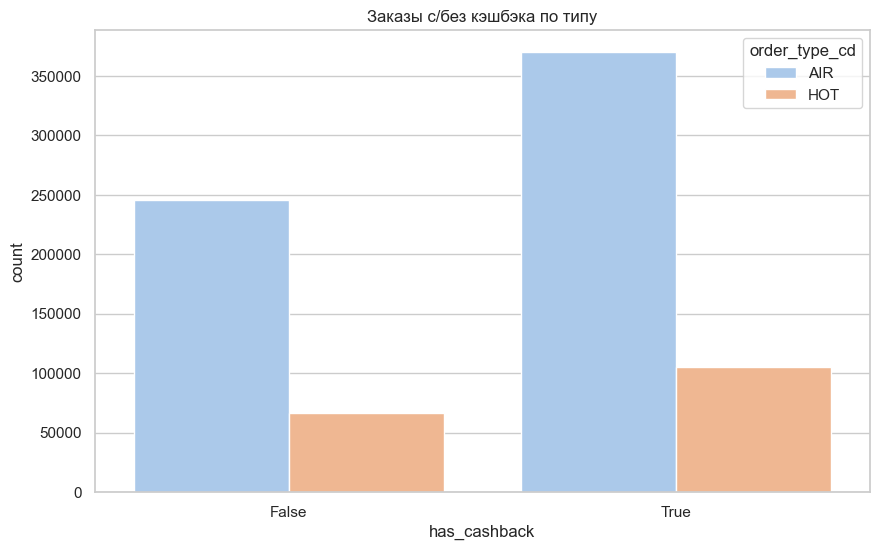


Доля заказов с кэшбэком:


has_cashback
True     0.568356
False    0.431644
Name: proportion, dtype: float64

In [11]:
# Анализ промокодов и кэшбэка

df['has_promo'] = df['promo_code_discount_amt'] > 0
plt.figure()
sns.countplot(x='has_promo', hue='order_type_cd', data=df)
plt.title('Заказы с/без промокода по типу')
plt.show()
print("\nДоля заказов с промокодом:")
display(df['has_promo'].value_counts(normalize=True))

promo_price = df.groupby(['has_promo', 'order_type_cd'], observed=True)['nominal_price_rub_amt'].mean()
print("\nСредняя цена заказа по промокодам и типу:")
display(promo_price)

df['has_cashback'] = df['loyalty_accrual_rub_amt'] > 0
plt.figure()
sns.countplot(x='has_cashback', hue='order_type_cd', data=df)
plt.title('Заказы с/без кэшбэка по типу')
plt.show()
print("\nДоля заказов с кэшбэком:")
display(df['has_cashback'].value_counts(normalize=True))

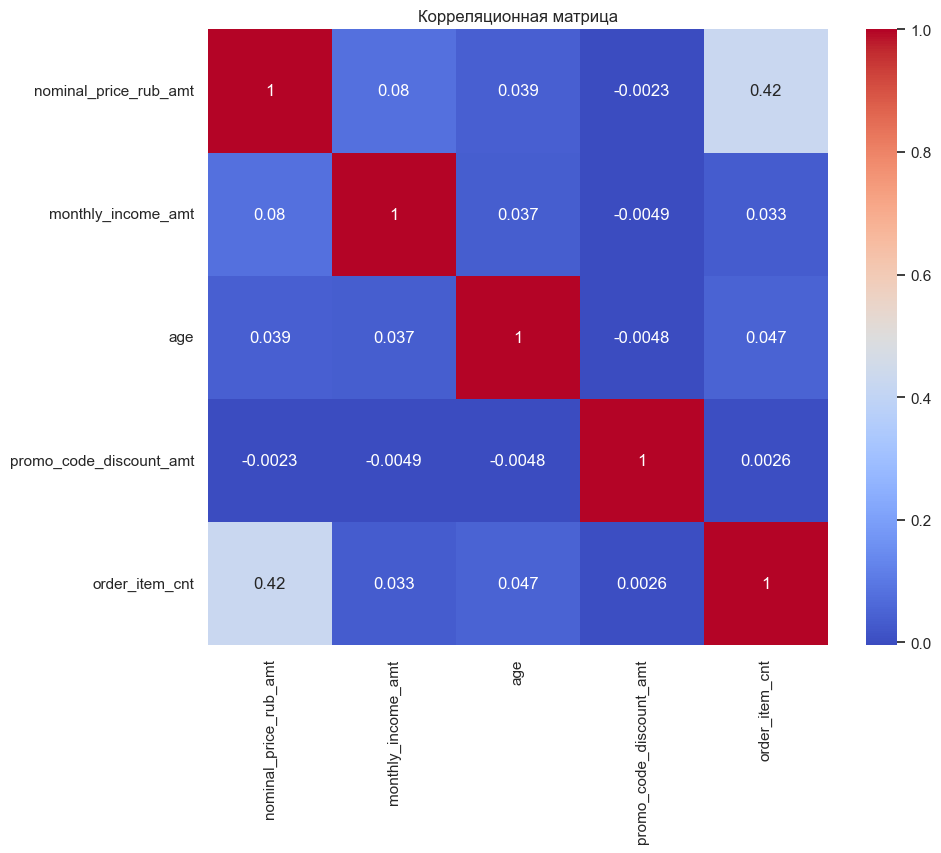

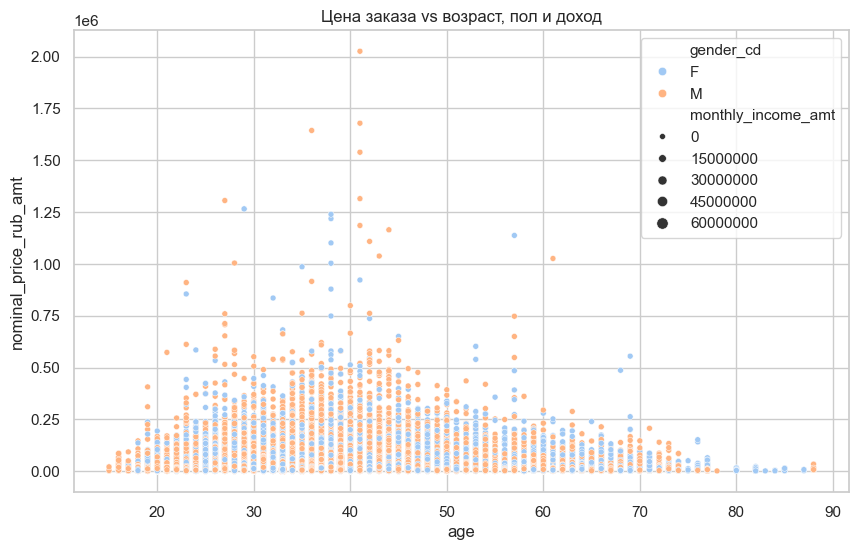

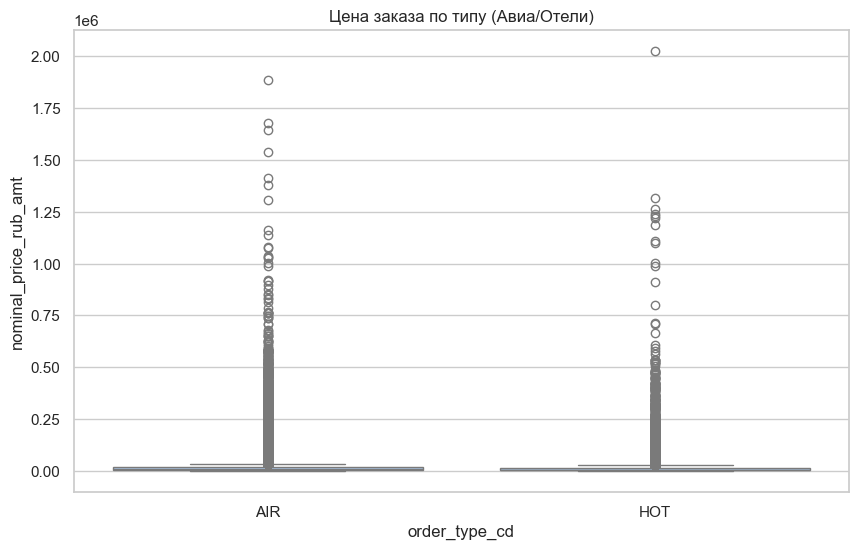

In [12]:
# Корреляционная матрица
numeric_cols = ['nominal_price_rub_amt', 'monthly_income_amt', 'age', 'promo_code_discount_amt', 'order_item_cnt']
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

plt.figure()
sns.scatterplot(x='age', y='nominal_price_rub_amt', hue='gender_cd', size='monthly_income_amt', data=df)
plt.title('Цена заказа vs возраст, пол и доход')
plt.show()

plt.figure()
sns.boxplot(x='order_type_cd', y='nominal_price_rub_amt', data=df)
plt.title('Цена заказа по типу (Авиа/Отели)')
plt.show()

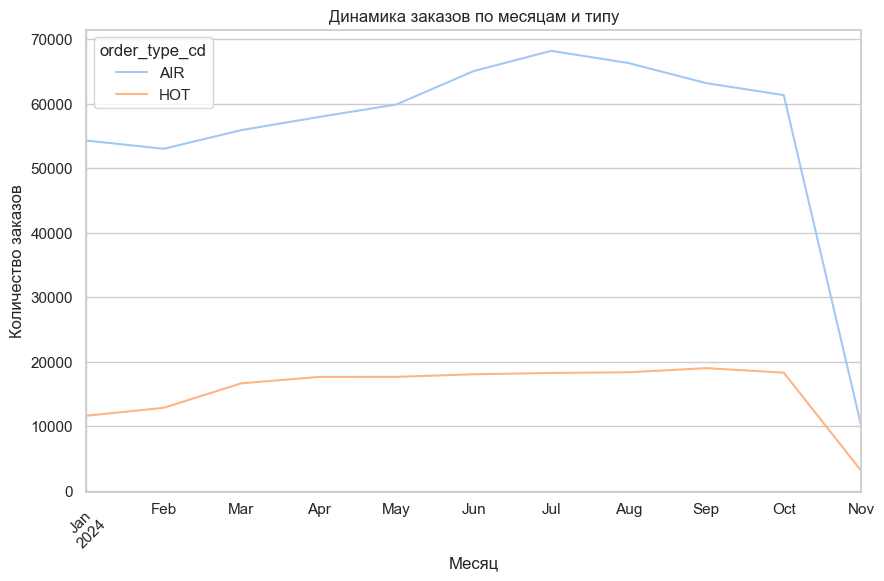

In [13]:
orders_by_month_type = df.groupby(['created_month', 'order_type_cd'], observed=True).size().unstack()
orders_by_month_type.plot(kind='line')
plt.title('Динамика заказов по месяцам и типу')
plt.xticks(rotation=45)
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.show()

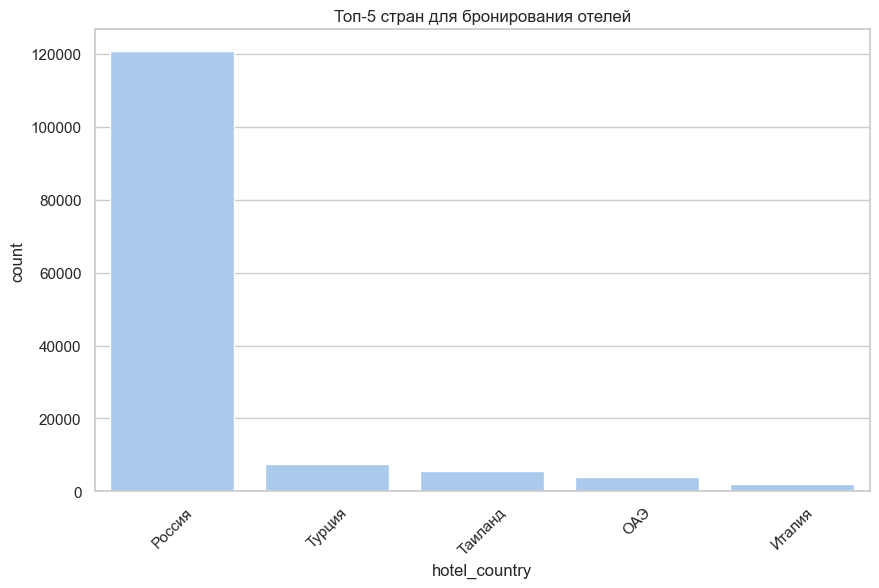


Доля стран для отелей:


hotel_country
Россия     0.744102
Турция     0.046293
Таиланд    0.034583
ОАЭ        0.024056
Италия     0.012339
Name: proportion, dtype: float64

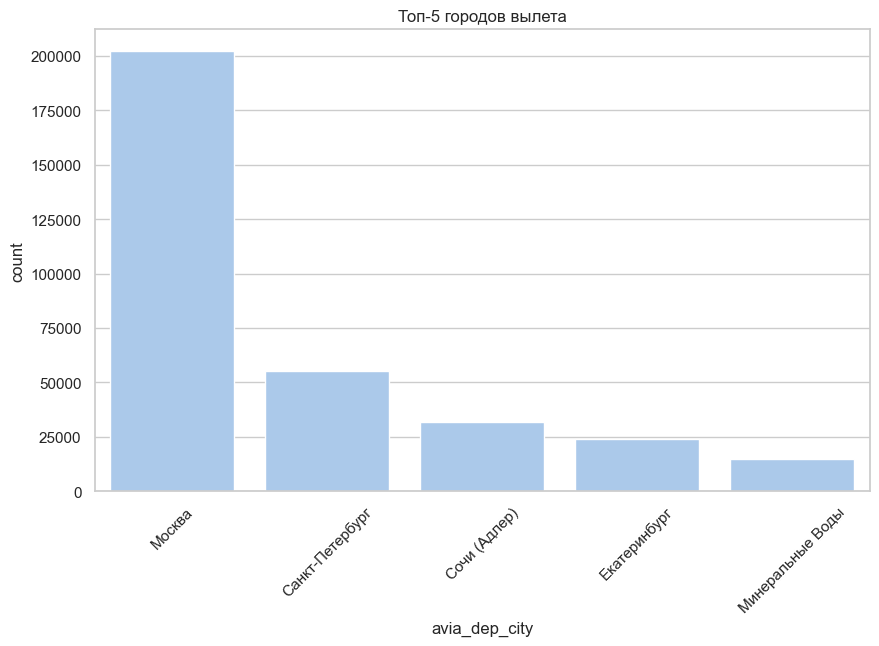


Доля городов вылета:


avia_dep_city
Москва              0.328334
Санкт-Петербург     0.089719
Сочи (Адлер)        0.052097
Екатеринбург        0.039012
Минеральные Воды    0.024142
Name: proportion, dtype: float64

In [14]:
plt.figure()
sns.countplot(x='hotel_country', data=df[df['order_type_cd'] == 'HOT'], order=df[df['order_type_cd'] == 'HOT']['hotel_country'].value_counts().index[:5])
plt.title('Топ-5 стран для бронирования отелей')
plt.xticks(rotation=45)
plt.show()
print("\nДоля стран для отелей:")
display(df[df['order_type_cd'] == 'HOT']['hotel_country'].value_counts(normalize=True).head(5))

plt.figure()
sns.countplot(x='avia_dep_city', data=df[df['order_type_cd'] == 'AIR'], order=df[df['order_type_cd'] == 'AIR']['avia_dep_city'].value_counts().index[:5])
plt.title('Топ-5 городов вылета')
plt.xticks(rotation=45)
plt.show()
print("\nДоля городов вылета:")
display(df[df['order_type_cd'] == 'AIR']['avia_dep_city'].value_counts(normalize=True).head(5))

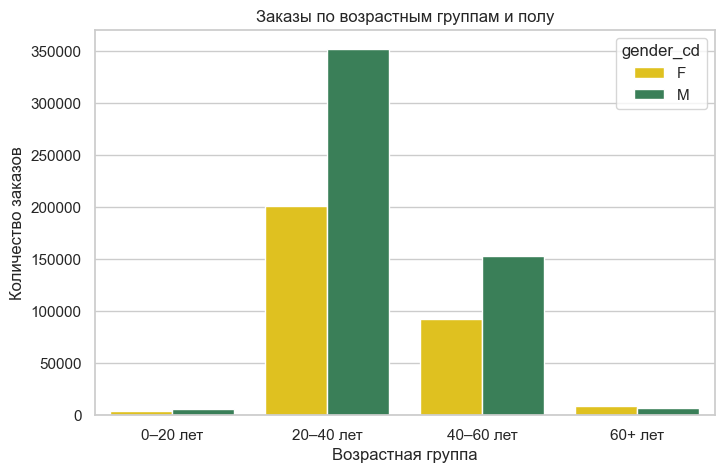


Доля заказов по возрастным группам и полу:


gender_cd,F,M
age_group,,
0–20 лет,0.004768,0.007593
20–40 лет,0.240370,0.421700
40–60 лет,0.110512,0.183676
60+ лет,0.010232,0.008706


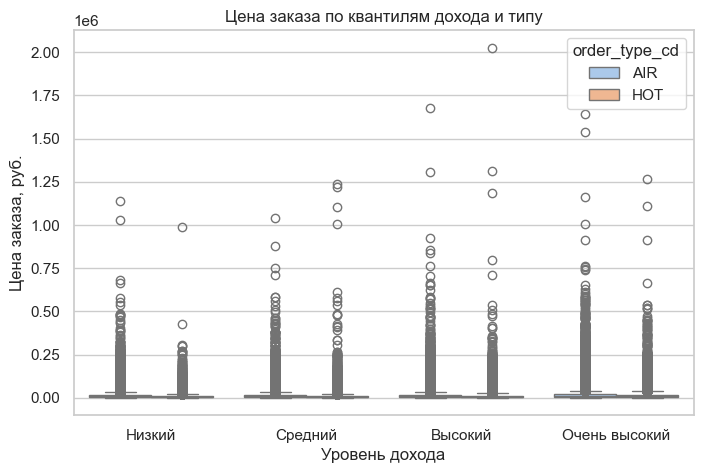

In [15]:
age_labels = {
    'A00': '0–20 лет',
    'A20': '20–40 лет',
    'A40': '40–60 лет',
    'A60': '60+ лет'
}

df['age_group'] = df['age_type_cd'].map(age_labels)

plt.figure(figsize=(8, 5))
sns.countplot(
    x='age_group', 
    hue='gender_cd', 
    data=df,
    hue_order=['F', 'M'],
    palette={'F': 'gold', 'M': 'seagreen'}  
)
plt.title('Заказы по возрастным группам и полу')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество заказов')
plt.show()

print("\nДоля заказов по возрастным группам и полу:")
display(df.groupby(['age_group', 'gender_cd'], observed=True).size().unstack() / len(df))

df['income_quantile'] = pd.qcut(
    df['monthly_income_amt'], 
    q=4, 
    labels=['Низкий', 'Средний', 'Высокий', 'Очень высокий'], 
    duplicates='drop'
)

plt.figure(figsize=(8, 5))
sns.boxplot(
    x='income_quantile', 
    y='nominal_price_rub_amt', 
    hue='order_type_cd', 
    data=df
)
plt.title('Цена заказа по квантилям дохода и типу')
plt.xlabel('Уровень дохода')
plt.ylabel('Цена заказа, руб.')
plt.show()

In [16]:
top_regions = df['lvn_state_nm'].value_counts().index[:5]
print("\nСредняя цена по регионам (Топ-5):")
display(df[df['lvn_state_nm'].isin(top_regions)].groupby('lvn_state_nm', observed=True)['nominal_price_rub_amt'].mean())


Средняя цена по регионам (Топ-5):


lvn_state_nm
Г МОСКВА              18314.108575
Г САНКТ-ПЕТЕРБУРГ     15541.624257
КРАСНОДАРСКИЙ КРАЙ    14679.054780
МОСКОВСКАЯ ОБЛ        16056.905540
СВЕРДЛОВСКАЯ ОБЛ      13425.560198
Name: nominal_price_rub_amt, dtype: float64

In [17]:
print("\nСредний кэшбэк по программам лояльности:")
display(df.groupby('loyalty_program_type_nm', observed=True)['loyalty_accrual_rub_amt'].mean())


Средний кэшбэк по программам лояльности:


loyalty_program_type_nm
AliExpress                             0.000000
AliExpressDebit                             NaN
All Airlines                         145.761364
All Airlines Premium                 226.896907
All Airlines Premium Кредитный       379.174497
All Airlines Private Кредитный       650.500000
All Games                             49.000000
All Games Debit                             NaN
AllAirLinesDebit                     154.945455
Bravo                                158.275362
Lamoda                                      NaN
LamodaDebit                                 NaN
Lukoil                               110.000000
LukoilDebit                                 NaN
MIPTDebit                            541.100000
S7                                    63.400000
S7 Tinkoff Premium                          NaN
S7 Tinkoff Premium Кредитный         907.400000
S7Debit                               21.000000
Tinkoff Black                        447.008344
Tinkoff Black BY

Топ-5 регионов:
['ВОЛГОГРАДСКАЯ ОБЛАСТЬ', 'ВОРОНЕЖСКАЯ ОБЛ.', 'МО', 'НИЖЕГОРОДСКАЯ', 'ОБЛ ТОМСКАЯ']


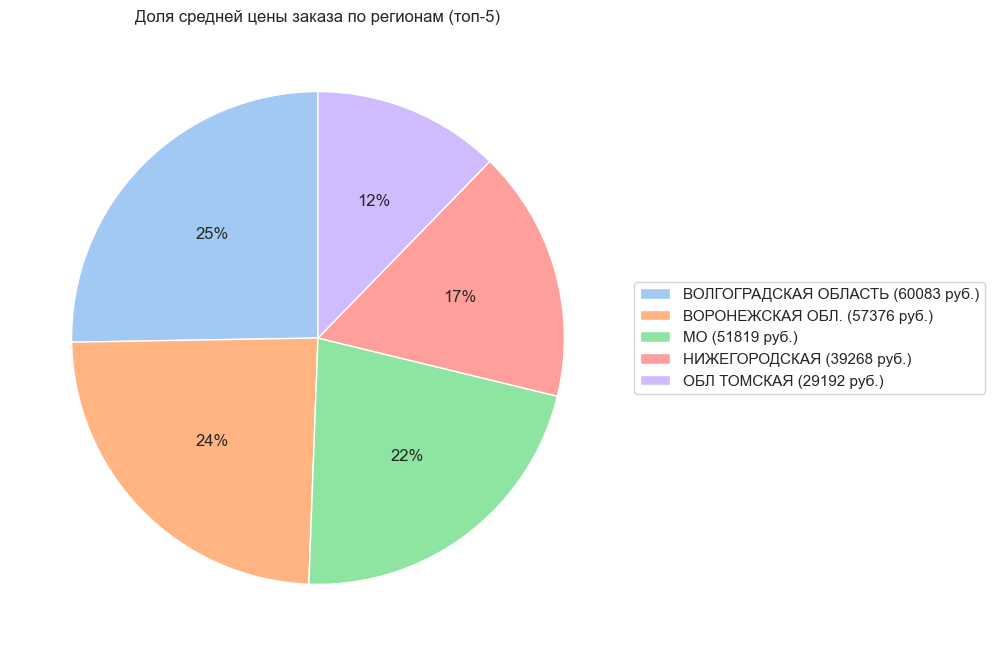

Доля средней цены заказа по регионам:
- ВОЛГОГРАДСКАЯ ОБЛАСТЬ: 60083 руб. (25.3% от общей суммы цен)
- ВОРОНЕЖСКАЯ ОБЛ.: 57376 руб. (24.1% от общей суммы цен)
- МО: 51819 руб. (21.8% от общей суммы цен)
- НИЖЕГОРОДСКАЯ: 39268 руб. (16.5% от общей суммы цен)
- ОБЛ ТОМСКАЯ: 29192 руб. (12.3% от общей суммы цен)


In [18]:
plt.rcParams['figure.figsize'] = (8, 8) 

exclude_regions = ['THAILAND', 'CYPRUS', 'UAE']
top_regions = df[~df['lvn_state_nm'].isin(exclude_regions)].groupby('lvn_state_nm', observed=True)['nominal_price_rub_amt'].mean().sort_values(ascending=False).head(5)

print("Топ-5 регионов:")
print(top_regions.index.tolist())

plt.figure()
plt.pie(top_regions.values, labels=None, autopct='%1.0f%%', startangle=90, colors=sns.color_palette("pastel", 5))
plt.title('Доля средней цены заказа по регионам (топ-5)')
plt.legend(labels=[f"{region} ({price:.0f} руб.)" for region, price in top_regions.items()], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

print("Доля средней цены заказа по регионам:")
for region, price in top_regions.items():
    print(f"- {region}: {price:.0f} руб. ({(price / top_regions.sum() * 100):.1f}% от общей суммы цен)")

In [19]:
anomaly_orders = df[df['lvn_state_nm'].isin(['UAE', 'CYPRUS', 'THAILAND'])]
print("Заказы с аномальными регионами:")
print(anomaly_orders[['lvn_state_nm', 'nominal_price_rub_amt', 'order_type_cd', 'hotel_country', 'avia_arr_city']])

Заказы с аномальными регионами:
       lvn_state_nm  nominal_price_rub_amt order_type_cd hotel_country  \
23407           UAE                11560.0           AIR           NaN   
48858           UAE               104687.0           AIR           NaN   
165761       CYPRUS                50646.0           HOT           ОАЭ   
194853          UAE                 7261.0           AIR           NaN   
292126          UAE                26334.0           AIR           NaN   
314005       CYPRUS                12857.0           AIR           NaN   
346412          UAE                 7261.0           AIR           NaN   
468103       CYPRUS                 7828.0           HOT         Китай   
484728          UAE                12318.0           AIR           NaN   
531802       CYPRUS                 6551.0           HOT           ОАЭ   
647486     THAILAND               147978.0           AIR           NaN   
659914     THAILAND               150420.0           AIR           NaN   
695416

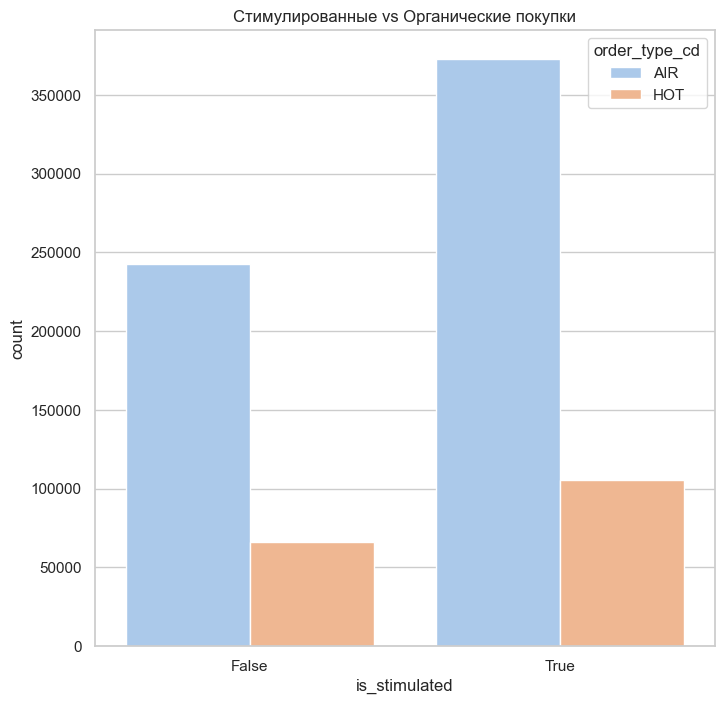

is_stimulated
False    15427.622691
True     15016.738589
Name: nominal_price_rub_amt, dtype: float64

In [20]:
df['is_stimulated'] = (df['promo_code_discount_amt'] > 0) | (df['loyalty_accrual_rub_amt'] > 0)
sns.countplot(x='is_stimulated', hue='order_type_cd', data=df)
plt.title('Стимулированные vs Органические покупки')
plt.show()

df.groupby('is_stimulated')['nominal_price_rub_amt'].mean()

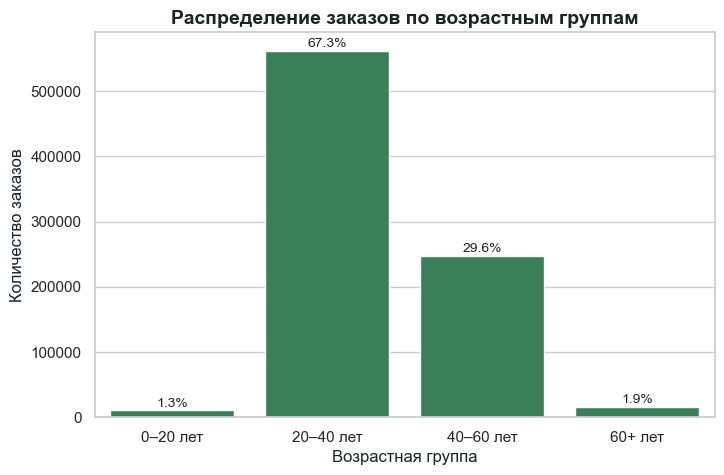

Доля сегмента 20–40 лет: 67.26%


In [21]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x='age_group', 
    data=df,
    color='seagreen',  
    order=['0–20 лет', '20–40 лет', '40–60 лет', '60+ лет']
)

total = len(df)  
for p in ax.patches:
    height = p.get_height() 
    percentage = 100 * height / total  
    ax.text(
        p.get_x() + p.get_width() / 2,  
        height + 0.01 * ax.get_ylim()[1],  
        f'{percentage:.1f}%',  
        ha='center', 
        fontsize=10, 
        color='#1C2526'  
    )

plt.title('Распределение заказов по возрастным группам', fontsize=14, weight='bold', color='#1C2526')
plt.xlabel('Возрастная группа', fontsize=12, color='#1C2526')
plt.ylabel('Количество заказов', fontsize=12, color='#1C2526')
plt.show()

a20_share = (df['age_group'] == '20–40 лет').mean()
print(f"Доля сегмента 20–40 лет: {a20_share:.2%}")

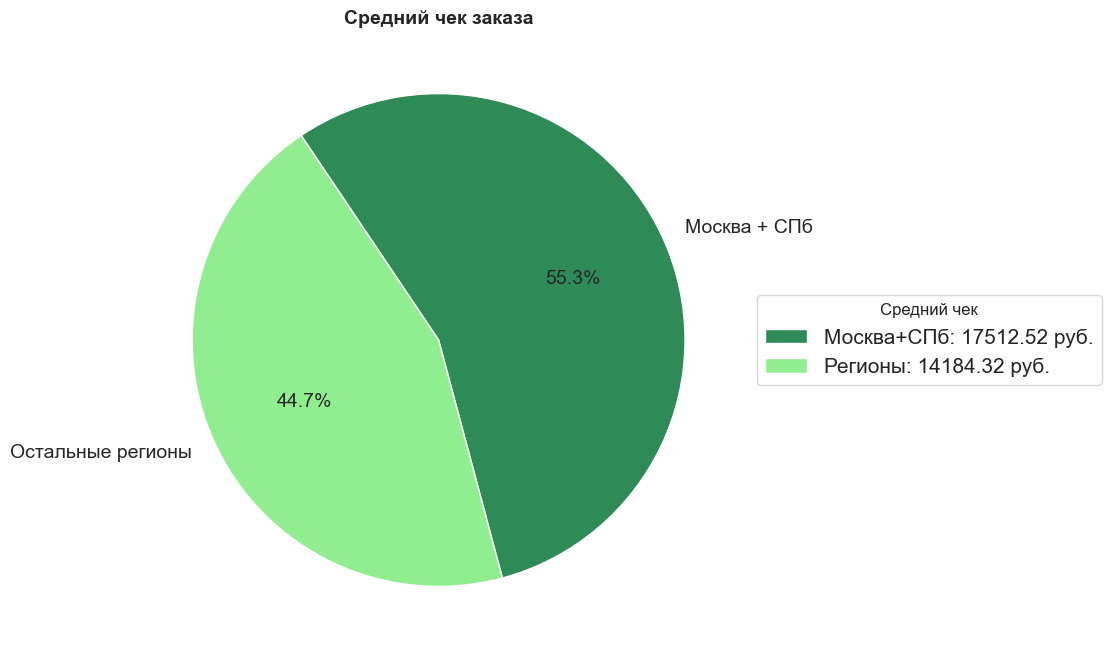

In [22]:
moscow_spb = df[df['lvn_state_nm'].isin(['Г МОСКВА', 'Г САНКТ-ПЕТЕРБУРГ'])]['nominal_price_rub_amt'].mean()
regions = df[~df['lvn_state_nm'].isin(['Г МОСКВА', 'Г САНКТ-ПЕТЕРБУРГ'])]['nominal_price_rub_amt'].mean()

aov_data = pd.DataFrame({
    'region': ['Москва + СПб', 'Остальные регионы'],
    'aov': [moscow_spb, regions]
})
colors = ['seagreen', 'lightgreen']

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    aov_data['aov'],
    labels=aov_data['region'],
    autopct='%1.1f%%',
    startangle=-75,
    colors=colors,
    textprops={'fontsize': 14}
)

plt.title('Средний чек заказа', fontsize=14, weight='bold')

legend_labels = [
    f"Москва+СПб: {moscow_spb:.2f} руб.",
    f"Регионы: {regions:.2f} руб."
]
plt.legend(wedges, legend_labels, title="Средний чек", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)
plt.show()

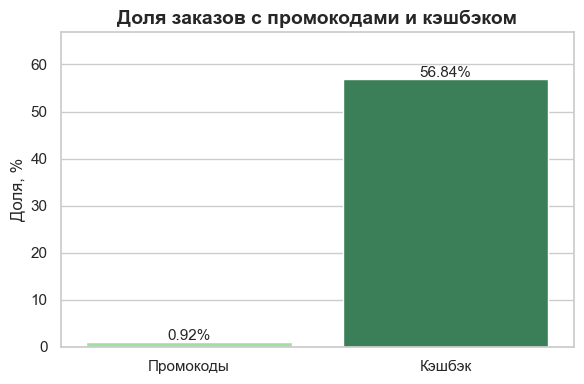

Доля промокодов: 0.92%
Доля кэшбэка: 56.84%


In [23]:
promo_cashback = df[['has_promo', 'has_cashback']].mean() * 100
promo_cashback = pd.DataFrame({
    'Тип': ['Промокоды', 'Кэшбэк'],
    'Доля, %': [promo_cashback['has_promo'], promo_cashback['has_cashback']]
})

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x='Тип', 
    y='Доля, %', 
    hue='Тип',      
    data=promo_cashback,
    palette=['lightgreen', 'seagreen'],
    dodge=False,          
    legend=False
)

for i, v in enumerate(promo_cashback['Доля, %']):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=11)

plt.title('Доля заказов с промокодами и кэшбэком', fontsize=14, weight='bold')
plt.ylim(0, promo_cashback['Доля, %'].max() + 10)  
plt.ylabel('Доля, %')
plt.xlabel('')
plt.tight_layout()
plt.show()

print(f"Доля промокодов: {promo_cashback.loc[0, 'Доля, %']:.2f}%")
print(f"Доля кэшбэка: {promo_cashback.loc[1, 'Доля, %']:.2f}%")

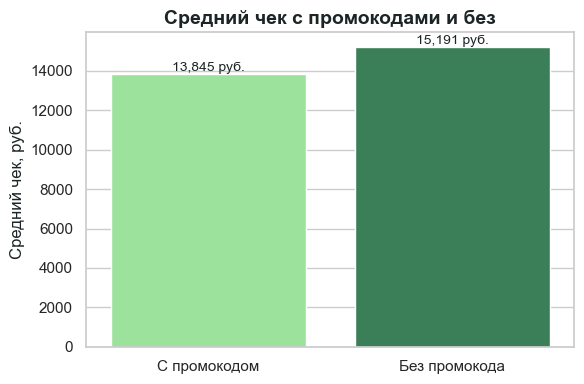

 с промокодом: 13,845.05 руб.
 без промокода: 15,191.31 руб.


In [24]:
aov_promo = df[df['has_promo'] == 1]['nominal_price_rub_amt'].mean()
aov_no_promo = df[df['has_promo'] == 0]['nominal_price_rub_amt'].mean()

aov_data = pd.DataFrame({
    'Тип': ['С промокодом', 'Без промокода'],
    'Средний чек, руб.': [aov_promo, aov_no_promo]
})

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x='Тип',
    y='Средний чек, руб.',
    hue='Тип',           
    data=aov_data,
    palette=['lightgreen', 'seagreen'],
    dodge=False,          
    legend=False         
)

plt.title('Средний чек с промокодами и без', fontsize=14, weight='bold', color='#1C2526')
plt.xlabel('', fontsize=12, color='#1C2526') 
plt.ylabel('Средний чек, руб.', fontsize=12, color='#1C2526')

for i, value in enumerate(aov_data['Средний чек, руб.']):
    ax.text(
        i, value + 0.01 * max(aov_data['Средний чек, руб.']),
        f'{value:,.0f} руб.',
        ha='center', fontsize=10, color='#1C2526'
    )

plt.tight_layout()
plt.show()
print(f" с промокодом: {aov_promo:,.2f} руб.")
print(f" без промокода: {aov_no_promo:,.2f} руб.")

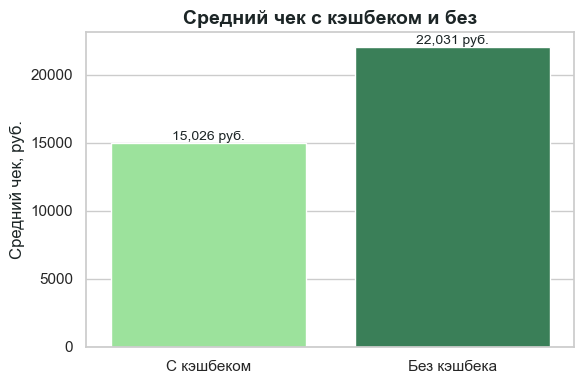

 с кэшбеком: 15,025.85 руб.
 без кэшбека: 22,030.63 руб.


In [25]:
aov_loyalty = df[df['loyalty_accrual_rub_amt'] > 0]['nominal_price_rub_amt'].mean()
aov_no_loyalty = df[df['loyalty_accrual_rub_amt'] == 0]['nominal_price_rub_amt'].mean()

aov_data_loyalty = pd.DataFrame({
    'Тип': ['С кэшбеком', 'Без кэшбека'],
    'Средний чек, руб.': [aov_loyalty, aov_no_loyalty]
})

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x='Тип',
    y='Средний чек, руб.',
    hue='Тип',            
    data=aov_data_loyalty,
    palette=['lightgreen', 'seagreen'],
    dodge=False,
    legend=False
)

for i, value in enumerate(aov_data_loyalty['Средний чек, руб.']):
    ax.text(
        i, value + 0.01 * max(aov_data_loyalty['Средний чек, руб.']),
        f'{value:,.0f} руб.',
        ha='center', fontsize=10, color='#1C2526'
    )

plt.title('Средний чек с кэшбеком и без', fontsize=14, weight='bold', color='#1C2526')
plt.xlabel('', fontsize=12, color='#1C2526') 
plt.ylabel('Средний чек, руб.', fontsize=12, color='#1C2526')
plt.tight_layout()
plt.show()

print(f" с кэшбеком: {aov_loyalty:,.2f} руб.")
print(f" без кэшбека: {aov_no_loyalty:,.2f} руб.")

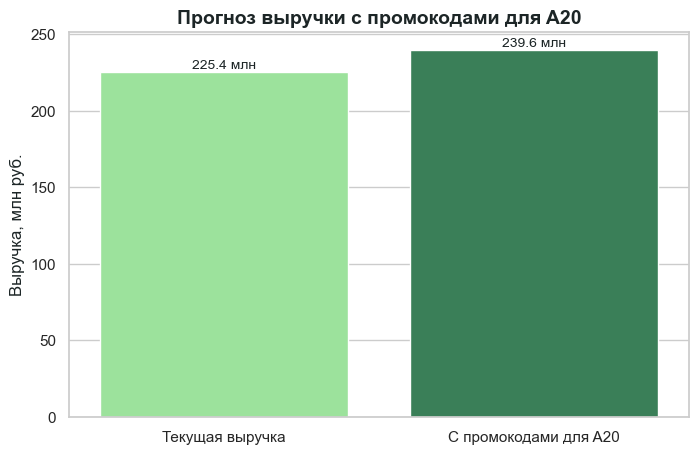

Число пользователей A20: 99,817
Текущая конверсия A20: 10.0%
Прогнозируемая конверсия A20: 12.0%
Текущая выручка: 225,384,352 руб.
Прогнозируемая выручка: 239,585,826 руб.
Рост выручки: 6.30%


In [26]:
total_users = len(df['client_rk'].unique()) 

a20_share = 0.672785  
base_conversion = 0.1  # Предполагаемая текущая конверсия 
aov_no_promo = 15191.31  
aov_promo = 13845.05

# Текущие
a20_users = total_users * a20_share  # Пользователи A20
base_orders_a20 = a20_users * base_conversion  # Заказы A20
base_revenue_a20 = base_orders_a20 * aov_no_promo  # Выручка A20
base_revenue_non_a20 = (total_users - a20_users) * base_conversion * aov_no_promo  # Выручка не-A20
base_total_revenue = base_revenue_a20 + base_revenue_non_a20  # Общая выручка

# Прогноз для A20 с промокодами
new_conversion_a20 = base_conversion * 1.2  # +20% конверсии для A20
new_orders_a20 = a20_users * new_conversion_a20  # Новые заказы A20
new_revenue_a20 = new_orders_a20 * aov_promo  # Выручка A20
new_total_revenue = new_revenue_a20 + base_revenue_non_a20  # Общая выручка

revenue_data = pd.DataFrame({
    'Сценарий': ['Текущая выручка', 'С промокодами для A20'],
    'Выручка, млн руб.': [base_total_revenue / 1e6, new_total_revenue / 1e6]
})

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Сценарий',
    y='Выручка, млн руб.',
    hue = 'Сценарий',
    data=revenue_data,
    palette=['lightgreen', 'seagreen'], 
)
plt.title('Прогноз выручки с промокодами для A20', fontsize=14, weight='bold', color='#1C2526')
plt.xlabel('', fontsize=12, color='#1C2526') 
plt.ylabel('Выручка, млн руб.', fontsize=12, color='#1C2526')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.01 * ax.get_ylim()[1],
        f'{height:,.1f} млн',
        ha='center',
        fontsize=10,
        color='#1C2526'
    )

plt.show()

print(f"Число пользователей A20: {a20_users:,.0f}")
print(f"Текущая конверсия A20: {base_conversion:.1%}")
print(f"Прогнозируемая конверсия A20: {new_conversion_a20:.1%}")
print(f"Текущая выручка: {base_total_revenue:,.0f} руб.")
print(f"Прогнозируемая выручка: {new_total_revenue:,.0f} руб.")
print(f"Рост выручки: {(new_total_revenue / base_total_revenue - 1):.2%}")

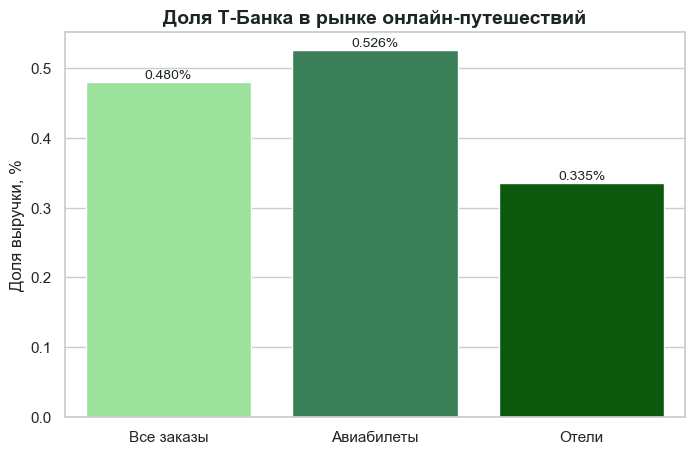

Выручка Т-Банка (всего): 11,350,946,745 RUB
Выручка (авиабилеты): 9,449,886,894 RUB
Выручка (отели): 1,901,059,851 RUB
Бронирования Т-Банка: 759,950
Весь рынок путешествий РФ (TAM): 4,730,000,000,000 RUB
Онлайн-бронирования (SAM): 2,365,000,000,000 RUB
Доля Т-Банка (всего): 0.480% от SAM
Доля Т-Банка (авиабилеты): 0.526% от SAM авиа
Доля Т-Банка (отели): 0.335% от SAM отелей
Доля бронирований: 1.277% от SAM
TAM: 4.73 трлн RUB (Росстат, 2023, с ростом 10%)
SAM: 2.15 трлн RUB (50% от TAM, онлайн-бронирования)
SOM: 11,350,946,745 RUB (0.480% от SAM)


In [27]:
try:

    df_success = df[df['order_status_cd'] == 'SUC']
    df_success = df_success[pd.to_datetime(df_success['created_dttm']).dt.year == 2024]

    if df_success.empty:
        raise ValueError("Нет успешных заказов за 2024 год")

    # Выручка и бронирования
    my_revenue_total = df_success['nominal_price_rub_amt'].sum()  # 11,350,946,745 RUB
    my_bookings_total = df_success.shape[0]  # 759,950

    revenue_by_product = df_success.groupby('order_type_cd', observed=True)['nominal_price_rub_amt'].sum().reset_index()
    bookings_by_product = df_success.groupby('order_type_cd', observed=True).size().reset_index(name='bookings')

    # Рыночные данные
    total_market_revenue = 4.73e12 
    online_market_revenue = total_market_revenue * 0.5  # 2.15 трлн
    online_market_bookings = 119e6 * 0.5  # 59.5 млн

    market_revenue_by_product = {
        'AIR': online_market_revenue * 0.76,  # 1.634 трлн
        'HOT': online_market_revenue * 0.24   # 0.516 трлн
    }

    revenue_by_product['Доля Т-Банка, %'] = revenue_by_product.apply(
        lambda row: row['nominal_price_rub_amt'] / market_revenue_by_product.get(row['order_type_cd'], 1) * 100, axis=1
    )
    revenue_by_product['Продукт'] = revenue_by_product['order_type_cd'].map({'AIR': 'Авиабилеты', 'HOT': 'Отели'})
    share_total = my_revenue_total / online_market_revenue * 100
    share_bookings = my_bookings_total / online_market_bookings * 100

    share_data = pd.DataFrame({
        'Категория': ['Все заказы', 'Авиабилеты', 'Отели'],
        'Доля Т-Банка, %': [share_total, revenue_by_product[revenue_by_product['order_type_cd'] == 'AIR']['Доля Т-Банка, %'].iloc[0],
                           revenue_by_product[revenue_by_product['order_type_cd'] == 'HOT']['Доля Т-Банка, %'].iloc[0]]
    })

    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        x='Категория',
        y='Доля Т-Банка, %',
        hue='Категория',
        data=share_data,
        palette=['lightgreen', 'seagreen', 'darkgreen'],
        legend=False
    )
    plt.title('Доля Т-Банка в рынке онлайн-путешествий', fontsize=14, weight='bold', color='#1C2526')
    plt.ylabel('Доля выручки, %', fontsize=12, color='#1C2526')
    plt.xlabel('', fontsize=12, color='#1C2526')

    for i, value in enumerate(share_data['Доля Т-Банка, %']):
        ax.text(
            i, value + 0.01 * max(share_data['Доля Т-Банка, %']),
            f'{value:.3f}%',
            ha='center', fontsize=10, color='#1C2526'
        )

    plt.show()

    print(f"Выручка Т-Банка (всего): {my_revenue_total:,.0f} RUB")
    print(f"Выручка (авиабилеты): {revenue_by_product[revenue_by_product['order_type_cd'] == 'AIR']['nominal_price_rub_amt'].iloc[0]:,.0f} RUB")
    print(f"Выручка (отели): {revenue_by_product[revenue_by_product['order_type_cd'] == 'HOT']['nominal_price_rub_amt'].iloc[0]:,.0f} RUB")
    print(f"Бронирования Т-Банка: {my_bookings_total:,}")
    print(f"Весь рынок путешествий РФ (TAM): {total_market_revenue:,.0f} RUB")
    print(f"Онлайн-бронирования (SAM): {online_market_revenue:,.0f} RUB")
    print(f"Доля Т-Банка (всего): {share_total:.3f}% от SAM")
    print(f"Доля Т-Банка (авиабилеты): {revenue_by_product[revenue_by_product['order_type_cd'] == 'AIR']['Доля Т-Банка, %'].iloc[0]:.3f}% от SAM авиа")
    print(f"Доля Т-Банка (отели): {revenue_by_product[revenue_by_product['order_type_cd'] == 'HOT']['Доля Т-Банка, %'].iloc[0]:.3f}% от SAM отелей")
    print(f"Доля бронирований: {share_bookings:.3f}% от SAM")
    print(f"TAM: 4.73 трлн RUB (Росстат, 2023, с ростом 10%)")
    print(f"SAM: 2.15 трлн RUB (50% от TAM, онлайн-бронирования)")
    print(f"SOM: {my_revenue_total:,.0f} RUB ({share_total:.3f}% от SAM)")

except ValueError as e:
    print(e)